### Bias-Variance Decomposition (Regression)

This notebook experiments with the decomposition of the performance error of several off-the-shelf sklearn regression algorithms to its bias and variance components. The list of estimators includes:
- Decision tree
- Random forest
- Bagging
- Gradient Boosting
- Linear regression
- Bayesian regression

The bias-variance decomposition is based on the mean squared error loss.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.data import boston_housing_data
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, \
    BaggingRegressor, GradientBoostingRegressor

In [2]:
# load features, labels
X, y = boston_housing_data()

# split to train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.3,                                                   
    random_state=123,                                                  
    shuffle=True # shuffle split
)

print('X:', X.shape)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X: (506, 13)
X_train: (354, 13)
X_test: (152, 13)


In [4]:
# estimators
estimators = {
    'DecisionTree': DecisionTreeRegressor(random_state=123),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=123),
    'Bagging': BaggingRegressor(n_estimators=100,random_state=123),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=123),
    'LinearRegression': LinearRegression(),
    'BayesianRidge': BayesianRidge()
}

# loss
avg_loss = [] # average expected loss
avg_bias = [] # average loss due to bias
avg_var = [] # average loss due to variance

# decomp loop
for est_name, est in estimators.items():
    print('Computing loss for', est_name)
    loss, bias, var = bias_variance_decomp(
        est,
        X_train,
        y_train,
        X_test,
        y_test, 
        loss='mse',
        random_seed=123
    )
    # store results
    avg_loss.append(loss)
    avg_bias.append(bias)
    avg_var.append(var)    

Computing loss for DecisionTree
Computing loss for RandomForest
Computing loss for Bagging
Computing loss for GradientBoosting
Computing loss for LinearRegression
Computing loss for BayesianRidge


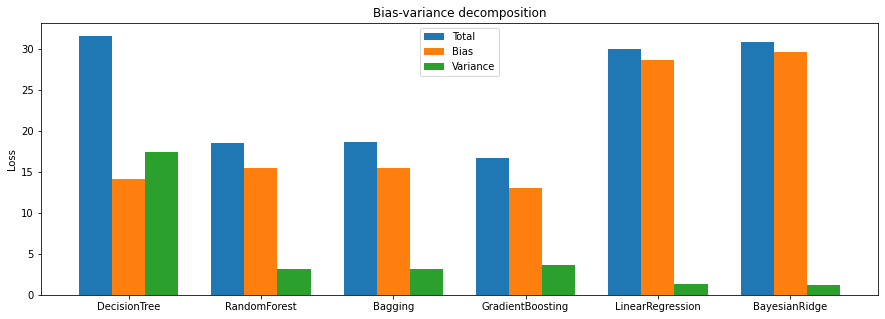

In [5]:
# plot results
est_names = list(estimators.keys())
ind = np.arange(len(est_names))
width = 0.25
#
fig, (ax) = plt.subplots(figsize=(15, 5))
ax.bar(ind, avg_loss, width)
ax.bar(ind+width, avg_bias, width)
ax.bar(ind+2*width, avg_var, width)
ax.set_title('Bias-variance decomposition')
ax.set_xticks(ind + width)
ax.set_xticklabels(est_names)
ax.legend(['Total', 'Bias', 'Variance'])
ax.set_ylabel('Loss')
plt.show()